<a href="https://colab.research.google.com/github/hamsika04/6thSem-ML-Lab/blob/main/1BM22CS054_Lab_6_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the IRIS dataset
iris_data = pd.read_csv("iris.csv")
X_iris = iris_data.iloc[:, :-1]  # Features
y_iris = iris_data.iloc[:, -1]   # Target

# Split dataset (80% training, 20% testing)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Build and train KNN classifier for IRIS dataset
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Choose an appropriate k value
knn_classifier.fit(X_train_iris, y_train_iris)

# Predict and evaluate KNN model
y_pred_iris = knn_classifier.predict(X_test_iris)

# Accuracy score
print("Accuracy Score:", accuracy_score(y_test_iris, y_pred_iris))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris))

# Classification report
print("Classification Report:\n", classification_report(y_test_iris, y_pred_iris))


Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the diabetes dataset (assuming the dataset is in CSV format)
diabetes_data = pd.read_csv("diabetes.csv")

# Features and target variable
X_diabetes = diabetes_data.iloc[:, :-1]  # Features (all columns except the last one)
y_diabetes = diabetes_data.iloc[:, -1]   # Target variable (last column)

# Split the dataset (80% training, 20% testing)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# Perform feature scaling (Standardization)
scaler = StandardScaler()
X_train_diabetes = scaler.fit_transform(X_train_diabetes)
X_test_diabetes = scaler.transform(X_test_diabetes)

# Build and train KNN classifier for the diabetes dataset
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Choose an appropriate k value (5 is common)
knn_classifier.fit(X_train_diabetes, y_train_diabetes)

# Predict and evaluate KNN model
y_pred_diabetes = knn_classifier.predict(X_test_diabetes)

# Accuracy score
print("Accuracy Score:", accuracy_score(y_test_diabetes, y_pred_diabetes))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_diabetes, y_pred_diabetes))


Accuracy Score: 0.6948051948051948
Confusion Matrix:
 [[79 20]
 [27 28]]


Best value of k: 7 with accuracy: 0.9180327868852459
Accuracy Score: 0.9180327868852459
Confusion Matrix:
 [[27  2]
 [ 3 29]]


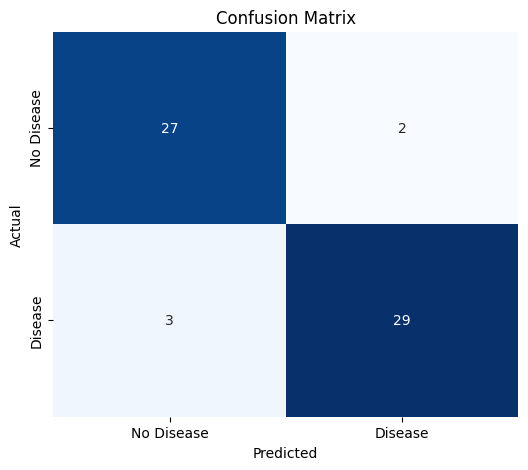

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the heart dataset (assuming the dataset is in CSV format)
heart_data = pd.read_csv("heart.csv")

# Features and target variable
X_heart = heart_data.iloc[:, :-1]  # Features (all columns except the last one)
y_heart = heart_data.iloc[:, -1]   # Target variable (last column)

# Split the dataset (80% training, 20% testing)
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart, y_heart, test_size=0.2, random_state=42)

# Perform feature scaling (Standardization)
scaler = StandardScaler()
X_train_heart = scaler.fit_transform(X_train_heart)
X_test_heart = scaler.transform(X_test_heart)

# Try different k values and choose the best one
k_values = range(1, 21)  # Trying values of k from 1 to 20
best_k = 1
best_score = 0

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_heart, y_train_heart)
    y_pred_heart = knn_classifier.predict(X_test_heart)
    score = accuracy_score(y_test_heart, y_pred_heart)

    if score > best_score:
        best_score = score
        best_k = k

print(f"Best value of k: {best_k} with accuracy: {best_score}")

# Train the KNN classifier with the best k value
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_heart, y_train_heart)

# Predict and evaluate KNN model
y_pred_heart = knn_classifier.predict(X_test_heart)

# Accuracy score
print("Accuracy Score:", accuracy_score(y_test_heart, y_pred_heart))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_heart, y_pred_heart)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
class_report = classification_report(y_test_heart, y_pred_heart)
print("Classification Report:\n", class_report)

# Plot classification report (optional, using text or matplotlib)
# You can display this report in a more readable way or save it
